In [2]:
import numpy as np
import pandas as pd

DATA_PATH = "../data/mbti_1.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
# get training data
def get_train_data(datapath=DATA_PATH):
    train_data = pd.read_csv(datapath)
    X = train_data['posts']
    y = train_data['type']
    return X, y

# split data into train and test
# form dataframe
def split_data(dataframe, size=0.2):
    train_data = dataframe.sample(frac=1-size, random_state=0)
    test_data = dataframe.drop(train_data.index)
    return train_data, test_data

# applying tf-idf vectorizer
def tfidf_vectorizer(X_train, X_test):
    vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train, X_test

# encode labels
def encode_labels(y):
    ie_encoding = {"I":1 , "E":-1}
    ns_encoding = {"N":1 , "S":-1}
    tf_encoding = {"T":1 , "F":-1}
    pj_encoding = {"P":1 , "J":-1}
    y_encoded = np.zeros((len(y), 4))
    for i, _y in enumerate(y):
        y_encoded[i][0] = ie_encoding[_y[0]]
        y_encoded[i][1] = ns_encoding[_y[1]]
        y_encoded[i][2] = tf_encoding[_y[2]]
        y_encoded[i][3] = pj_encoding[_y[3]]
    
    return y_encoded 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'INFJ'),
  Text(1, 0, 'ENTP'),
  Text(2, 0, 'INTP'),
  Text(3, 0, 'INTJ'),
  Text(4, 0, 'ENTJ'),
  Text(5, 0, 'ENFJ'),
  Text(6, 0, 'INFP'),
  Text(7, 0, 'ENFP'),
  Text(8, 0, 'ISFP'),
  Text(9, 0, 'ISTP'),
  Text(10, 0, 'ISFJ'),
  Text(11, 0, 'ISTJ'),
  Text(12, 0, 'ESTP'),
  Text(13, 0, 'ESFP'),
  Text(14, 0, 'ESTJ'),
  Text(15, 0, 'ESFJ')])

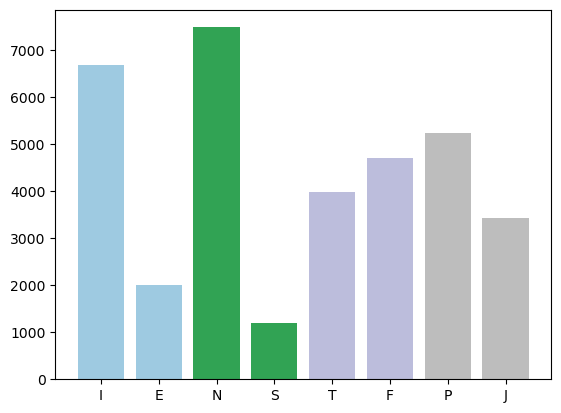

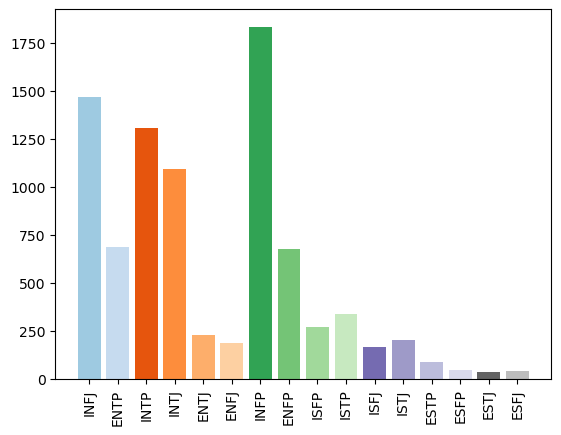

In [9]:
# for each mbti type, 4 different classifiers are trained
# I/E, N/S, T/F, P/J
# view the counts for those 8 types
def get_counts(y_train):
    counts = {"I":0, "E":0, "N":0, "S":0, "T":0, "F":0, "P":0, "J":0}
    for i in range(len(y_train)):
        for c in y_train[i]:
            counts[c] += 1
    return counts

# plot the counts and labels with text
# I/E, N/S, T/F, P/J with 4 different colors
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab20c')

X_train, _y = get_train_data(datapath=DATA_PATH)
counts = get_counts(_y)
plt.bar(range(len(counts)), list(counts.values()), align='center', color=cmap([0.1,0.1,0.4,0.4,0.7,0.7,0.9,0.9]))
plt.xticks(range(len(counts)), list(counts.keys()))

# also plot the counts for 16 different types
def get_counts_16(y_train):
    counts = {}
    for i in range(len(y_train)):
        if y_train[i] not in counts:
            counts[y_train[i]] = 1
        else:
            counts[y_train[i]] += 1
    return counts
counts_16 = get_counts_16(_y)
# plot them with 16 different colors and labels
# in a new figure, and make the x inerval bigger
plt.figure()
plt.bar(range(len(counts_16)), list(counts_16.values()), align='center', color = cmap(np.linspace(0.1, 0.9, len(counts_16))))
plt.xticks(range(len(counts_16)), list(counts_16.keys()))
plt.xticks(rotation=90)

If we directly classify the data to 16 classes, since the data distribution is not balenced, the model will be biased to the majority class.
If we seperately train 4 classifiers, each respectively for 1 personality dimension, the dataset will be more balanced, and the model will be more accurate.

[[ 1.         -0.04589856 -0.06957279 -0.1619395 ]
 [-0.04589856  1.         -0.08095363 -0.01492205]
 [-0.06957279 -0.08095363  1.          0.00467333]
 [-0.1619395  -0.01492205  0.00467333  1.        ]]


<Axes: >

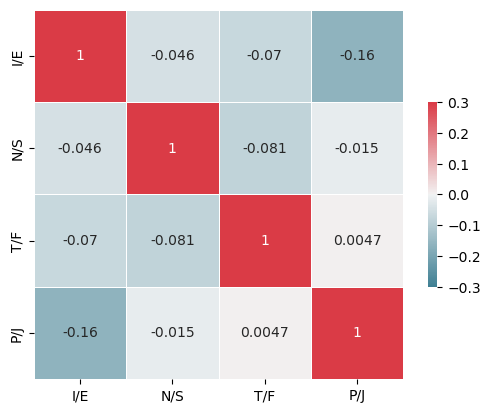

In [4]:
# correlation matrix for 4 dimensions
# I/E, N/S, T/F, P/J
def get_correlation_matrix(y_train):
    y_encoded = encode_labels(y_train)
    correlation_matrix = np.corrcoef(y_encoded.T)
    return correlation_matrix
    
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the correlation matrix
correlation_matrix = get_correlation_matrix(_y)
print(correlation_matrix)
# plt.figure()
# plt.imshow(correlation_matrix, cmap=cmap, interpolation='nearest')
# # shoe xticks on the top of the figure
# plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False , labeltop=True)
# plt.xticks(range(4), ['I/E', 'N/S', 'T/F', 'P/J'])
# plt.yticks(range(4), ['I/E', 'N/S', 'T/F', 'P/J'])
sns.heatmap(
    correlation_matrix,          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
    xticklabels=['I/E', 'N/S', 'T/F', 'P/J'],
    yticklabels=['I/E', 'N/S', 'T/F', 'P/J']
    
)


In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
# clean the data
# remove urls, and punctuations
# remove stop words
# remove numbers
# remove MBTI types
def clean_data(X_train):
    ps = PorterStemmer()
    X_train_cleaned = []
    for i in range(len(X_train)):
        # remove urls
        X_train[i] = re.sub(r'http\S+', '', X_train[i])
        # remove punctuations
        X_train[i] = X_train[i].translate(str.maketrans('', '', string.punctuation))
        # remove stop words
        # X_train[i] = ' '.join([word for word in X_train[i].split() if word not in stopwords.words('english')]) # remove numbers
        X_train[i] = ''.join([i for i in X_train[i] if not i.isdigit()])
        # stemming
        # X_train[i] = ' '.join([ps.stem(word) for word in X_train[i].split()])
        # remove MBTI types
        mbti_types = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp','isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
        for mbti_type in mbti_types:
            X_train[i] = X_train[i].replace(mbti_type, '')
        # also upper case
        for mbti_type in mbti_types:
            X_train[i] = X_train[i].replace(mbti_type.upper(), '')
        X_train_cleaned.append(X_train[i])
    return X_train_cleaned

[nltk_data] Downloading package stopwords to /home/tan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.posts[0].split('|||').__len__()
# average word counts per post
# average word length per word
X_train, _y = get_train_data(datapath=DATA_PATH)
X_train_cleaned = clean_data(X_train)

In [7]:
from textblob import TextBlob
def get_average_length_and_emotion(X_train):
    average_word_counts = []
    average_word_length = []
    average_emo_score = []
    for i in range(len(X_train)):
        posts = X_train[i].split('|||')
        total_word_counts = 0
        total_char_counts = 0
        emo_score = 0
        for post in posts:
            blob = TextBlob(post)
            emo_score += blob.sentiment.polarity
            words = post.split()
            total_word_counts += len(words)
            for word in words:
                total_char_counts += len(word)
        average_word_counts.append(total_word_counts / len(posts))
        average_word_length.append(total_char_counts / total_word_counts)
        average_emo_score.append(emo_score / len(posts))
    return average_word_counts, average_word_length, average_emo_score
df['cleaned_posts'] = X_train_cleaned
df['average_word_counts'], df['average_word_length'], df['average_emo_score'] = get_average_length_and_emotion(df.posts)

In [8]:
y_encoded = encode_labels(df.type)
df['y_encoded'] = y_encoded.tolist()
# save df to csv
df.to_csv('../data/mbti_1_cleaned.csv', index=False)
